In [1]:
simple linear regression model
estimates the relationship between 2 quantitative variables where one is referred to as the independent variable(X)(predictor) and the other dependent variable(Y)(response variable).
the value of y is obtained from X by finding the line of best fit with min error for the data points on a scatter plot for both variables. 
we will develop a multivariate multiple regression model to study effect of eight input variables on 2 output variables

In [2]:
collinearity and assumptions for linear regression
for better understanding we explain the assumptions made by linear regression by comparing results on our energy efficiency dataset and a dummy linear dataset generated to have similar shape

#in a normal line of best fit the data must be spread on the line

In [3]:
#Linearity - the relationship between the variables is linear such that a straight line is the line of best fit.

In [4]:
#Homoscedasticity - the residuals or prediction errors are of equal or constant variance

In [5]:
#Normality - the residuals are of a normal distribution with mean and median at 0


Overall, before inferences are drawn from a linear regression model, all the assumptions discussed above must have been met.



In [6]:
A cost function is a measure of the performance of a model i.e. how far or close the predicted values 
are to the real values. The objective is to minimise the cost function in order for the model to continuously 
learn to obtain better results. In linear regression, the cost function can be defined as the sum of squared errors in a training set. The squares of the residuals are taken to penalise errors farther 
from the line of best fit more than those closer to the line and obtain the best parameter values. 

SyntaxError: invalid syntax (<ipython-input-6-1f0a7a407706>, line 1)

In [7]:
Gradient descent is an optimization algorithm that minimizes a cost function by specifying the direction 
to move towards to obtain a local or global minima. This is done by initially starting with random values 
then iteratively updating the values until the minimum cost is obtained.  A learning rate is usually chosen 
to determine the step size to be taken for each iteration. It is important to carefully select this parameter 
because, if a small step is chosen, it will take a long time to converge to the minimum cost while if too large, 
it can result in an overshoot surpassing the location of the minimum cost.

SyntaxError: invalid syntax (<ipython-input-7-1370d01adeda>, line 1)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('ENB2012_data.xlsx - Φύλλο1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [4]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [5]:
column_names = {'X1':'Relative_Compactness','X2':'Surface_Area','X3':'Wall_Area','X4':'Roof_Area','X5':'Overall_Height','X6':'Orientation','X7':'Glazing_Area','X8':'Glazing_Area_Distribution','Y1':'Heating_Load','Y2':'Cooling_Load'}

In [6]:
df = df.rename(columns=column_names)

In [7]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [8]:
simple_linear_reg_df = df[['Relative_Compactness','Cooling_Load']].sample(15,random_state=2)

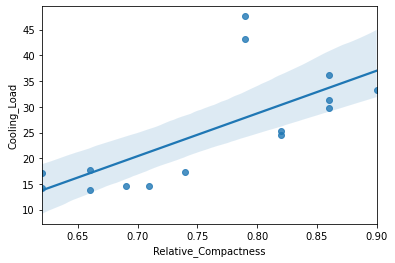

In [9]:
#regression plot
sns.regplot(x="Relative_Compactness",y="Cooling_Load",data=simple_linear_reg_df)

In [17]:
#measuring regression performance

In [18]:
#Mean Absolute Error (MAE)

#Firstly, we normalise our dataset to a common scale using the min max scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [19]:
normalised_df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085
...,...,...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0,0.320032,0.282790
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0,0.283904,0.161056
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0,0.281208,0.167250
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0,0.282286,0.153784


In [20]:
features_df = normalised_df.drop(columns=['Heating_Load','Cooling_Load'])
features_df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0


In [21]:
heating_target = normalised_df['Heating_Load']
heating_target

0      0.257212
1      0.257212
2      0.257212
3      0.257212
4      0.399838
         ...   
763    0.320032
764    0.283904
765    0.281208
766    0.282286
767    0.286600
Name: Heating_Load, Length: 768, dtype: float64

In [22]:
#seperate the dataset into training and test data with features and target data

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df,heating_target,test_size=0.3,random_state=1)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

Multiple Linear Regression
It establishes the relationship between the response variable and the predictors (2 or more) 
Multiple linear regression assumes that there is no sifgnificant correlation between the predictors. 
While the relationship between variables can be linear, it allows for non-linear relationships that are not straight lines

Collinearity
a linear relationship between 2 variables that ranges from -1 to +1 with 0 indicating no correlation

Multicollinearity
2 or more of the predictors have a strong correlation 

Since predictors are expected to be independent, when multicollinearity occurs, the correlated variables cannot independently contribute to predicting the value of the response variable. 

Not all predictors are relevant in obtaining better results from the model. 

Adding more independent variables to the model is not always better instead, it might only make the model more complicated. 

To resolve this, one of the correlated predictors is selected and the other removed from the data. 



Polynomial regression
A polynomial regression is considered a linear regression model that can be used when a curvilinear relationship exists between the predictors and the response variable. 

For a single independent variable where n is the degree of the polynomial and y is the linear function of delta. 
Complexity in the model increases as there will be more interactions in the model when multiple predictors are present and so does the degree increases.

1.Coefficients of multiple linear regression
2.General notations

Measuring regression performance
To check regression model performance we need to check how close the predicted value is to the ground truth.
It is very important to use the APPROPRIATE metric to evaluate the model perfoamcen

MEAN ABSOLUTE ERROR

Easy
Intuitive
Computes sum of average of absolute error between the predicted values and the true values. 
Since the absolute difference is taken, this metric does not consider direction.
However, absolute difference is obtained it is unable to give information about the model overshooting or undershooting
smaller MAE, better model
most robust to outliers

In [27]:
#normalize dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load','Cooling_Load'])
heating_target = normalised_df['Heating_Load']

In [28]:
#split the dataset into the training and testing dataset. 
#Recall that we had earlier segmented the featuers and target variables.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features_df,heating_target,test_size=0.3,random_state=1)

In [29]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
predicted_values = linear_model.predict(x_test)

In [30]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae,3)

0.063

Residual sum of squares (RSS)
also known as sum of squared residuals
explains the variance in the representation of the dataset by the model
it measures how well the model approximates the data. 
A residual is the estimated error made by a model. 
In simpler terms, it is the difference between the nth true value and the nth predicted value by the model. 
RSS is the sum of the square of errors between the residuals in a model

In [31]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,predicted_values))
round(rmse,3)

0.089

In [ ]:
R-Squared
Also known as coefficient of determination
a metric used in regression to find the goodness of fit of the model
values ranging from 0 to 1, it gives information on the % of the response variable explained by the model. 
mostly the higher the value, the better the model but this is not necessarily always true. 

In [33]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,predicted_values)
round(r2_score,3)

0.894

Model Complexity, Underfitting, Overfitting

Model complexity refers to the number of input features used to train a model and the algorithmic learning complexity. 

An overly complex model can be difficult to interpret, prone to overfitting and also require more computing.

When creating models, it is imperative for the model to generalise well enough to make reasonable predictions on new and unseen data. 

An overfit model will perform well on training data and poorly on unseen data. This one memorizes the training set, fits the noise, outliers and irrelevant information, then makes predictions based on this noise which is incorrect. 

When a model is too simple it can be as a result of having very few features not sufficient enough to learn details and relationships in the data. 

In a later section, we will discuss methods that can be used to achieve optimal and acceptable model complexities while avoiding overfitting and underfitting.

In [ ]:
The bias variance tradeoff

Bias and variance are common occurrences in ML and there is a constant struggle to achieve low bias and variance.
Bias is a measure of correctness of a model i.e. how far off is a model from being correct?
While high bias results in an increase in the error by making assumptions which prevent the model from capturing relevant relationships between the predictors and response variable
Low biases gives lower error and also prevents underfitting by capturing important relationships. 

Variance tells how much the values estimated by a model will vary across different training data. 
When variance is low, it meants that there is only a small change in the estimate obtained with new training data.
A high variance causes overfitting such that the changes in estimates obtained with new training data is large because the model is so complex that it has now learnt patterns from one training data such that it can't generalise to other training sets. 
While it is essential to obtain low bias and low variance, it is almost impossible to achieve this simultaneously which is where the bias variance tradeoff occurs.